Tugas Linear Regression

**data set**

In [1]:
import pandas as pd

bola = {'diameter' : [3,4,5,11,12],
        'harga' : [5,7,8,13,14]}

bola_df = pd.DataFrame(bola)
bola_df

,diameter,harga
0,3,5
1,4,7
2,5,8
3,11,13
4,12,14


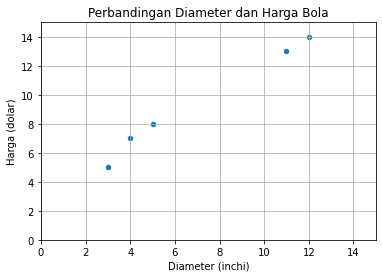

In [3]:
import matplotlib.pyplot as plt

bola_df.plot(kind='scatter', x='diameter', y='harga')

plt.title('Perbandingan Diameter dan Harga Bola')
plt.xlabel('Diameter (inchi)')
plt.ylabel('Harga (dolar)')
plt.xlim(0,15)
plt.ylim(0,15)
plt.grid(True)
plt.show()

**Model Simple Linear Regresssion**

1. Penyesuaian Data Set

In [4]:
import numpy as np

x = np.array(bola_df['diameter'])
y = np.array(bola_df['harga'])

print(f'x : {x}')
print(f'y : {y}')

x : [ 3  4  5 11 12]
y : [ 5  7  8 13 14]


In [7]:
x = x.reshape(-1,1)
x.shape

(5, 1)

In [8]:
x

array([[ 3],
       [ 4],
       [ 5],
       [11],
       [12]])

**Training Simple Linear Regression Model**

In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Visualisasi Simple Linear Regression**

In [10]:
x_vis = np.array([0,15]).reshape(-1,1)
y_vis = model.predict(x_vis)

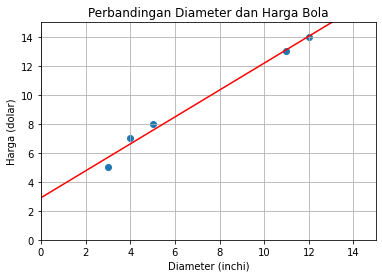

In [11]:
plt.scatter(x,y)
plt.plot(x_vis, y_vis, '-r')

plt.title('Perbandingan Diameter dan Harga Bola')
plt.xlabel('Diameter (inchi)')
plt.ylabel('Harga (dolar)')
plt.xlim(0,15)
plt.ylim(0,15)
plt.grid(True)
plt.show()

In [12]:
print(f'intercept: {model.intercept_}')
print(f'slope: {model.coef_}')

intercept: 2.9000000000000004
slope: [0.92857143]


**Menghitung Slope**

In [15]:
print(f'x:\n{x}\n')
print(f'x flatten: {x.flatten()}\n')
print(f'y: {y}')

x:
[[ 3]
 [ 4]
 [ 5]
 [11]
 [12]]

x flatten: [ 3  4  5 11 12]

y: [ 5  7  8 13 14]


**Variance**

In [16]:
variance_x = np.var(x.flatten(), ddof=1)
print(f'variance: {variance_x}')

variance: 17.5


**Covariance**

In [17]:
np.cov(x.flatten(), y)

array([[17.5 , 16.25],
       [16.25, 15.3 ]])

In [23]:
covariance_xy = np.cov(x.flatten(), y)[0][1]
print(f'covariance: {covariance_xy}')

covariance: 16.25


**Nilai Slope**

In [24]:
slope = covariance_xy / variance_x
print(f'slope : {slope}')

slope : 0.9285714285714286


**Mencari nilai Intercept** dengan memanfaatkan rumus

9e78d188-aec3-46dc-bc3b-c593e5304937.gif

In [25]:
intercept = np.mean(y) - slope * np.mean(x)
print(f'intercept: {intercept}')

intercept: 2.9000000000000004


**Prediksi Harga Bola berdasarkan Diameter**

In [26]:
diameter_bola = np.array([3, 4, 5]).reshape(-1,1)
diameter_bola

array([[3],
       [4],
       [5]])

In [27]:
prediksi_harga = model.predict(diameter_bola)
prediksi_harga

array([5.68571429, 6.61428571, 7.54285714])

In [29]:
for dmtr, hrg in zip(diameter_bola, prediksi_harga):
  print(f'Diameter : {dmtr} prediksi harga : {hrg}')

Diameter : [3] prediksi harga : 5.685714285714286
Diameter : [4] prediksi harga : 6.614285714285715
Diameter : [5] prediksi harga : 7.542857142857144


**Evaluasi Simple Linear Regression Model Training & Testing Dataset**

In [30]:
x_train = np.array([3, 4, 5 , 11, 12]).reshape(-1,1)
y_train = np.array([5, 7, 8, 13, 14])

x_test = np.array([4, 6, 9, 10, 14]).reshape(-1,1)
y_test = np.array([5, 7, 11, 14, 16])

**Training Simple Linear Regression Model**

In [31]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Evaluasi Linear Regression Model dengan Coefficient of Determination (R-Square)**

In [33]:
from sklearn.metrics import r2_score

y_pred = model.predict(x_test)

r_square = r2_score(y_test, y_pred)
print(f'R-square: {r_square}')

R-square: 0.9044744658426751


Karena R-square sangat mendekati 100% (jika dalam persentase) maka model tersebut sangat baik sekali dengan hasil R-square 0.9044744658426751